In [1]:
import xarray as xr
import numpy as np
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs 
import cartopy.feature as cfeat
from metpy.units import units
import metpy.calc as mpcalc
import cmocean as cmo
from numpy import zeros, newaxis
import shapefile as shp
import geopandas as gpd
import pygrib
import os
import pygrib
import cmocean
import glob
import netCDF4
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.ticker import FixedLocator, FixedFormatter
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
from sklearn.metrics import r2_score

ERROR 1: PROJ: proj_create_from_database: Open of /home/eflicker/.conda/envs/OrionEnv/share/proj failed


In [3]:
obsst=np.load('Observed_Monthly_SST_ElNino_3.4.npy')
modsst=np.load('ModelAverage_MonthlyTemp_El_Nino_3.4.npy')
obulw=np.load('Observed_ULWRF_MonthlyAverages_ElNino3.4.npy')
modulw=np.load('Model_ULWRF_Monthly_Averages_ElNino3.4.npy')
obtcc=np.load('Observed_Monthly_TCC_ElNino_3.4.npy')
modtcc=np.load('ModelAverage_TCC_El_Nino_3.4.npy')
moddsw=np.load('Model_DSWRF_ElNino3.4.npy')
obsdsw=np.load('Observed_DSWRF_MonthlyAverages_ElNino3.4.npy')
oin=np.load('OIN_Index.npy')
longobsst=np.load('Observed_Monthly_SST_ElNino_3.4_9_1983_6_2023.npy')

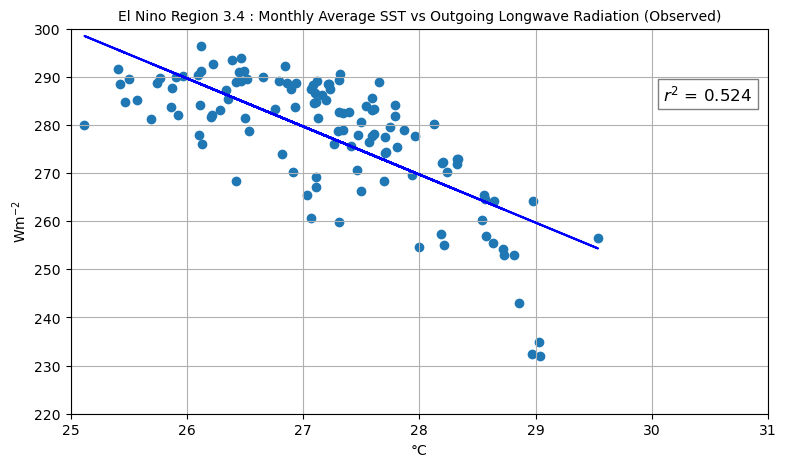

In [6]:
x=longobsst[344:464]
y=obulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

# Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 285, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(220,300)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('El Nino Region 3.4 : Monthly Average SST vs Outgoing Longwave Radiation (Observed)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)


plt.plot(x, p(x), 'b')

plt.annotate("r-squared = {:.3f}".format(R_sq), (0, 1))
plt.savefig('Obs_Scatter_SST_vs_ULWRF.png', format='png')

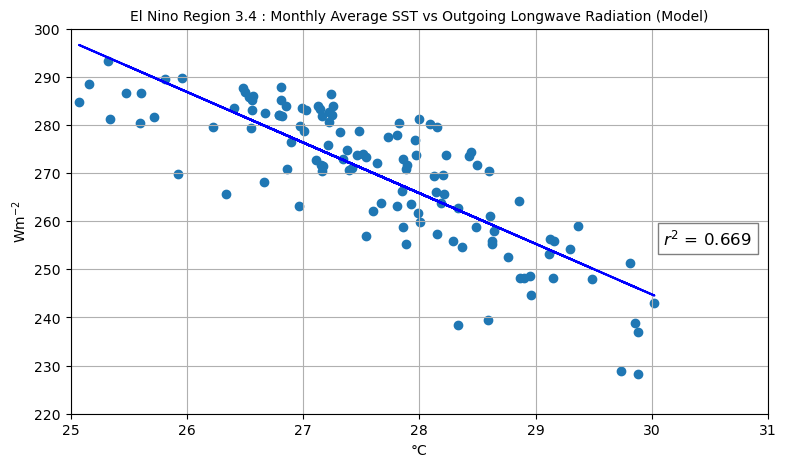

In [51]:
x=modsst
y=modulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.1, 255, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(220,300)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('El Nino Region 3.4 : Monthly Average SST vs Outgoing Longwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Model_Scatter_SST_vs_ULWRF.png', format='png')

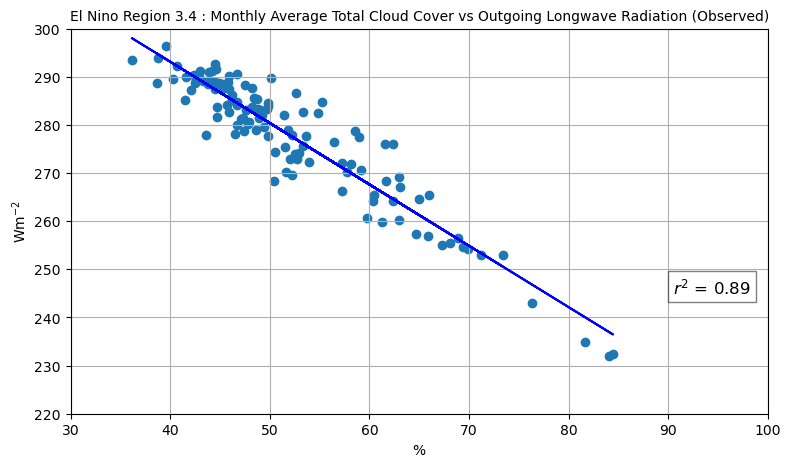

In [54]:
x=obtcc
y=obulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(90.5, 245, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(220,300)
plt.xlim(30,100)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs Outgoing Longwave Radiation (Observed)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Obs_Scatter_TCC_vs_ULWRF.png', format='png')

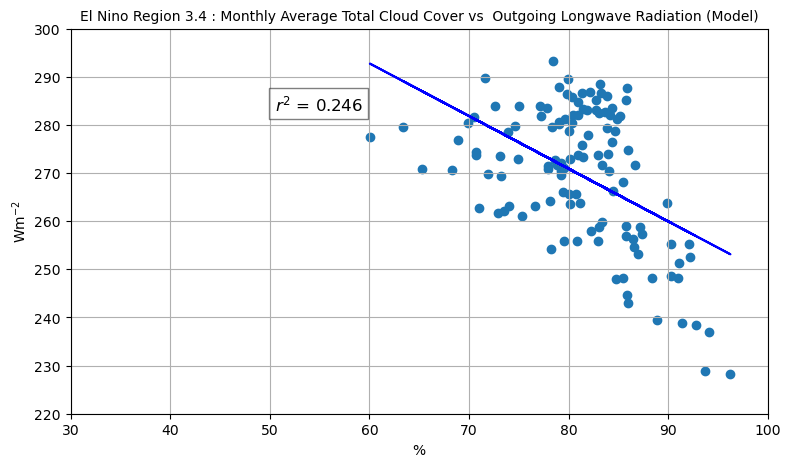

In [57]:
x=modtcc
y=modulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(50.5, 283, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(220,300)
plt.xlim(30,100)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs  Outgoing Longwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Model_Scatter_TCC_vs_ULWRF.png', format='png')

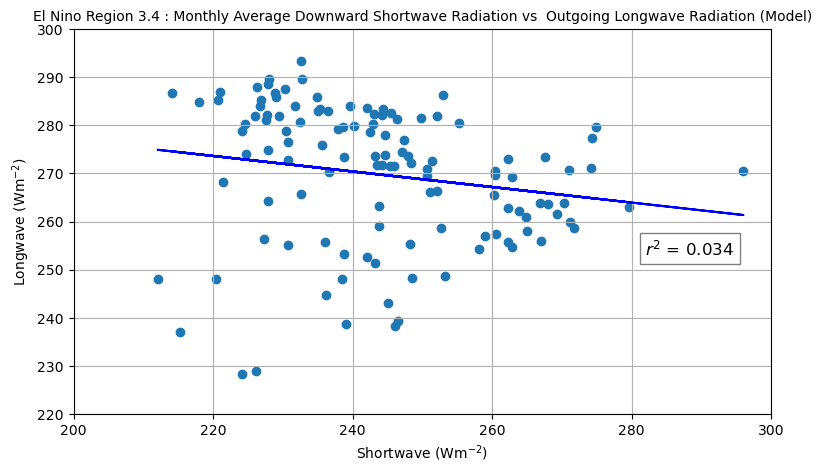

In [59]:
x=moddsw
y=modulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(282, 253, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("Longwave ($\mathregular{Wm^{-2}}$)")
plt.grid()
plt.ylim(220,300)
plt.xlim(200,300)
plt.xlabel("Shortwave ($\mathregular{Wm^{-2}}$)")
plt.title('El Nino Region 3.4 : Monthly Average Downward Shortwave Radiation vs  Outgoing Longwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Model_Scatter_DSWRF_vs_ULWRF.png', format='png')

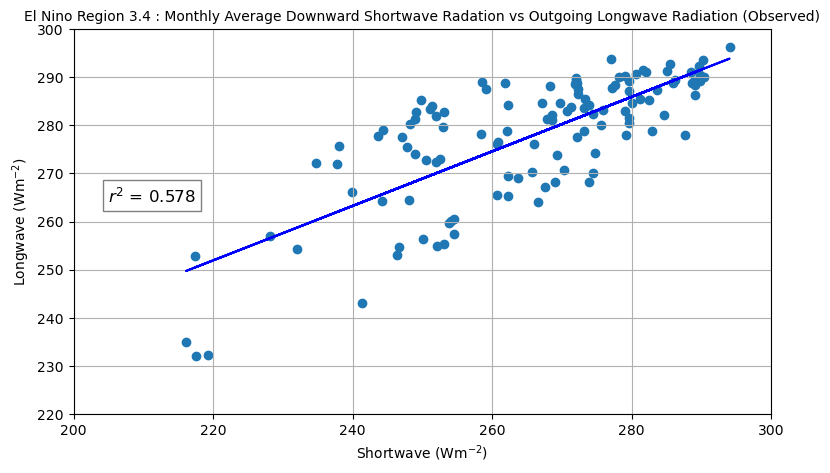

In [61]:
x=obsdsw
y=obulw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(205, 264, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("Longwave ($\mathregular{Wm^{-2}}$)")
plt.grid()
plt.ylim(220,300)
plt.xlim(200,300)
plt.xlabel("Shortwave ($\mathregular{Wm^{-2}}$)")
plt.title('El Nino Region 3.4 : Monthly Average Downward Shortwave Radation vs Outgoing Longwave Radiation (Observed)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Obs_Scatter_DSWRF_vs_ULWRF.png', format='png')

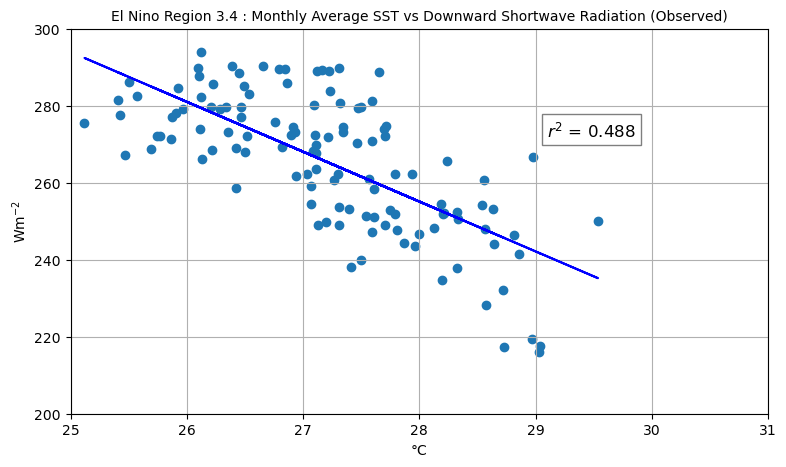

In [13]:
x=longobsst[344:464]
y=obsdsw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(29.1, 272, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(200,300)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('El Nino Region 3.4 : Monthly Average SST vs Downward Shortwave Radiation (Observed)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Obs_Scatter_SST_vs_DSWRF.png', format='png')

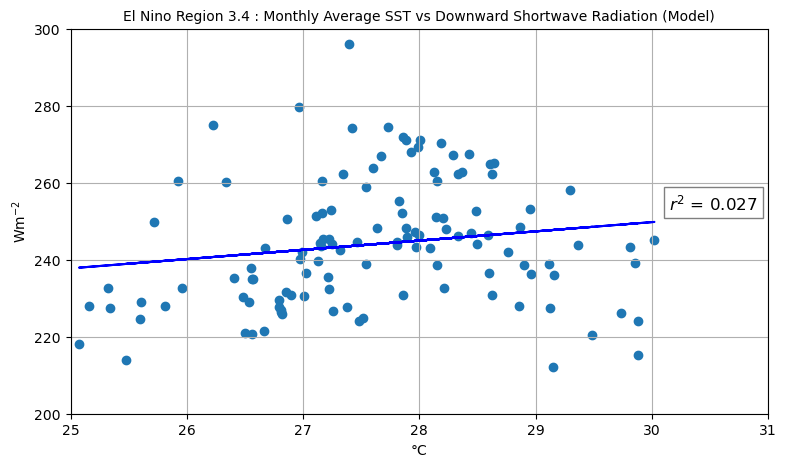

In [68]:
x=modsst
y=moddsw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

#Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(30.15, 253, '$r^2$ = ' +str(rq), fontsize = 12, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(200,300)
plt.xlim(25,31)
plt.xlabel('°C')
plt.title('El Nino Region 3.4 : Monthly Average SST vs Downward Shortwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Model_Scatter_SST_vs_DSWRF.png', format='png')

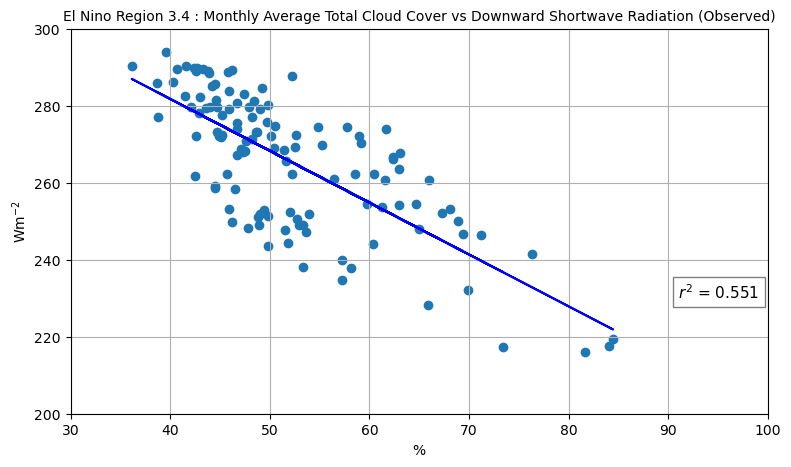

In [73]:
x=obtcc
y=obsdsw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

# Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(91, 230, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(200,300)
plt.xlim(30,100)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs Downward Shortwave Radiation (Observed)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Obs_Scatter_TCC_vs_DSWRF.png', format='png')

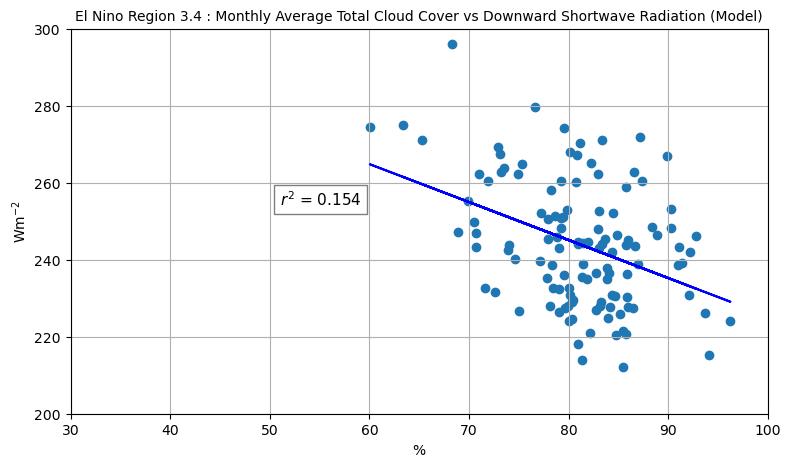

In [78]:
x=modtcc
y=moddsw
plt.figure(figsize=(9,5))
plt.scatter(x, y)

# Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(51, 254, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("$\mathregular{Wm^{-2}}$")
plt.grid()
plt.ylim(200,300)
plt.xlim(30,100)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs Downward Shortwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
plt.savefig('Model_Scatter_TCC_vs_DSWRF.png', format='png')

/tmp/ipykernel_115956/3993908659.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


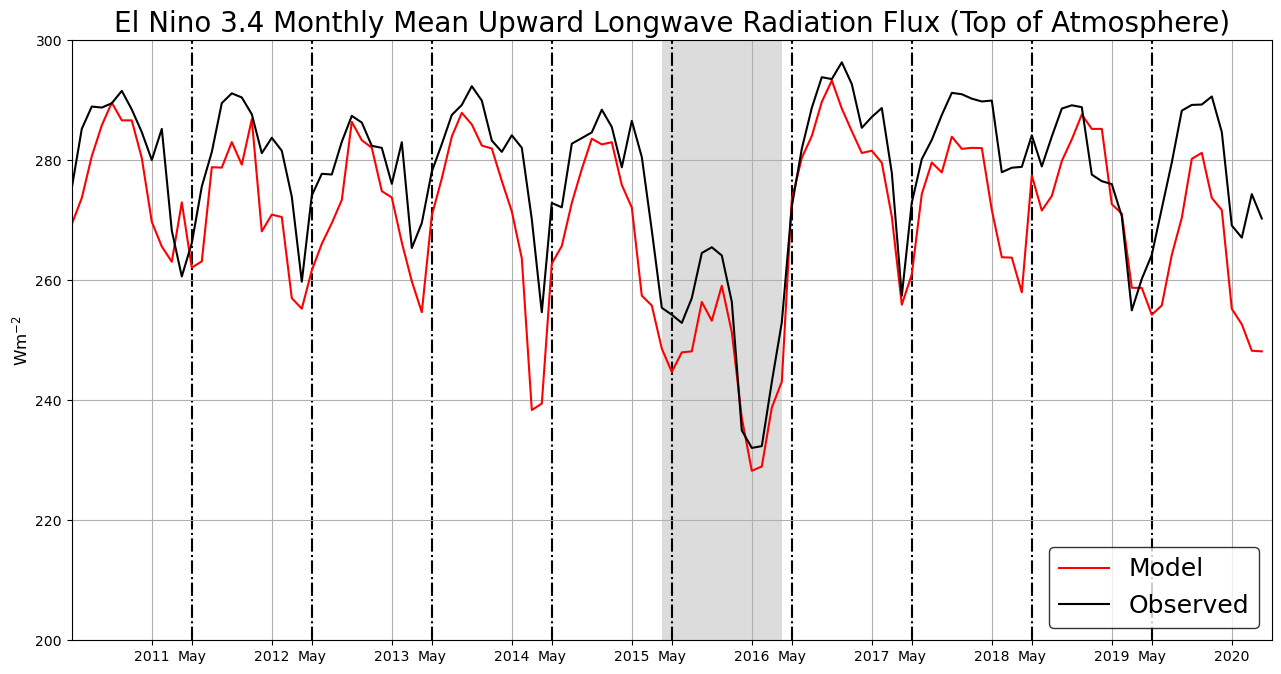

In [4]:
# El Nino 3.4 Average ULWRF Graph

fig=plt.figure(figsize=(12,6))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(modulw,'r', label="Model")
line2=ax.plot(obulw,'black', label="Observed")
ax.grid()
ax.set_title("El Nino 3.4 Monthly Mean Upward Longwave Radiation Flux (Top of Atmosphere)", fontsize=20)
ax.set_xlim(0,120)
ax.set_ylim(200,300)
ax.legend(loc='lower right', fontsize=18, edgecolor='black')
ax.set_ylabel("$\mathregular{Wm^{-2}}$", fontsize=12)
#'meters $\mathregular{10^1}$'
ax_formatter= FixedFormatter(['2011','May', '2012', 'May','2013', 'May','2014', 'May','2015','May', '2016', 'May','2017', 'May','2018','May', '2019', 'May','2020'])
ax_locator=FixedLocator([8,12, 20,24, 32, 36,44,48, 56,60, 68,72, 80,84, 92,96, 104,108, 116])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)

# Highlighting Strong El Nino Time Period 
plt.axvspan(59, 71, facecolor='gainsboro', alpha=1)

arra=np.arange(1,19,2)
for i in arra:
    a = ax.get_xgridlines()
    b = a[i]
    b.set_color('black')
    b.set_linestyle('dashdot')
    b.set_linewidth(1.5)
    
plt.savefig("ElNino3.4_Monthly_Mean_ULWRF_2.jpg", format='jpg', dpi=100, bbox_inches='tight')

/tmp/ipykernel_121155/3996314219.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ax_formatter)


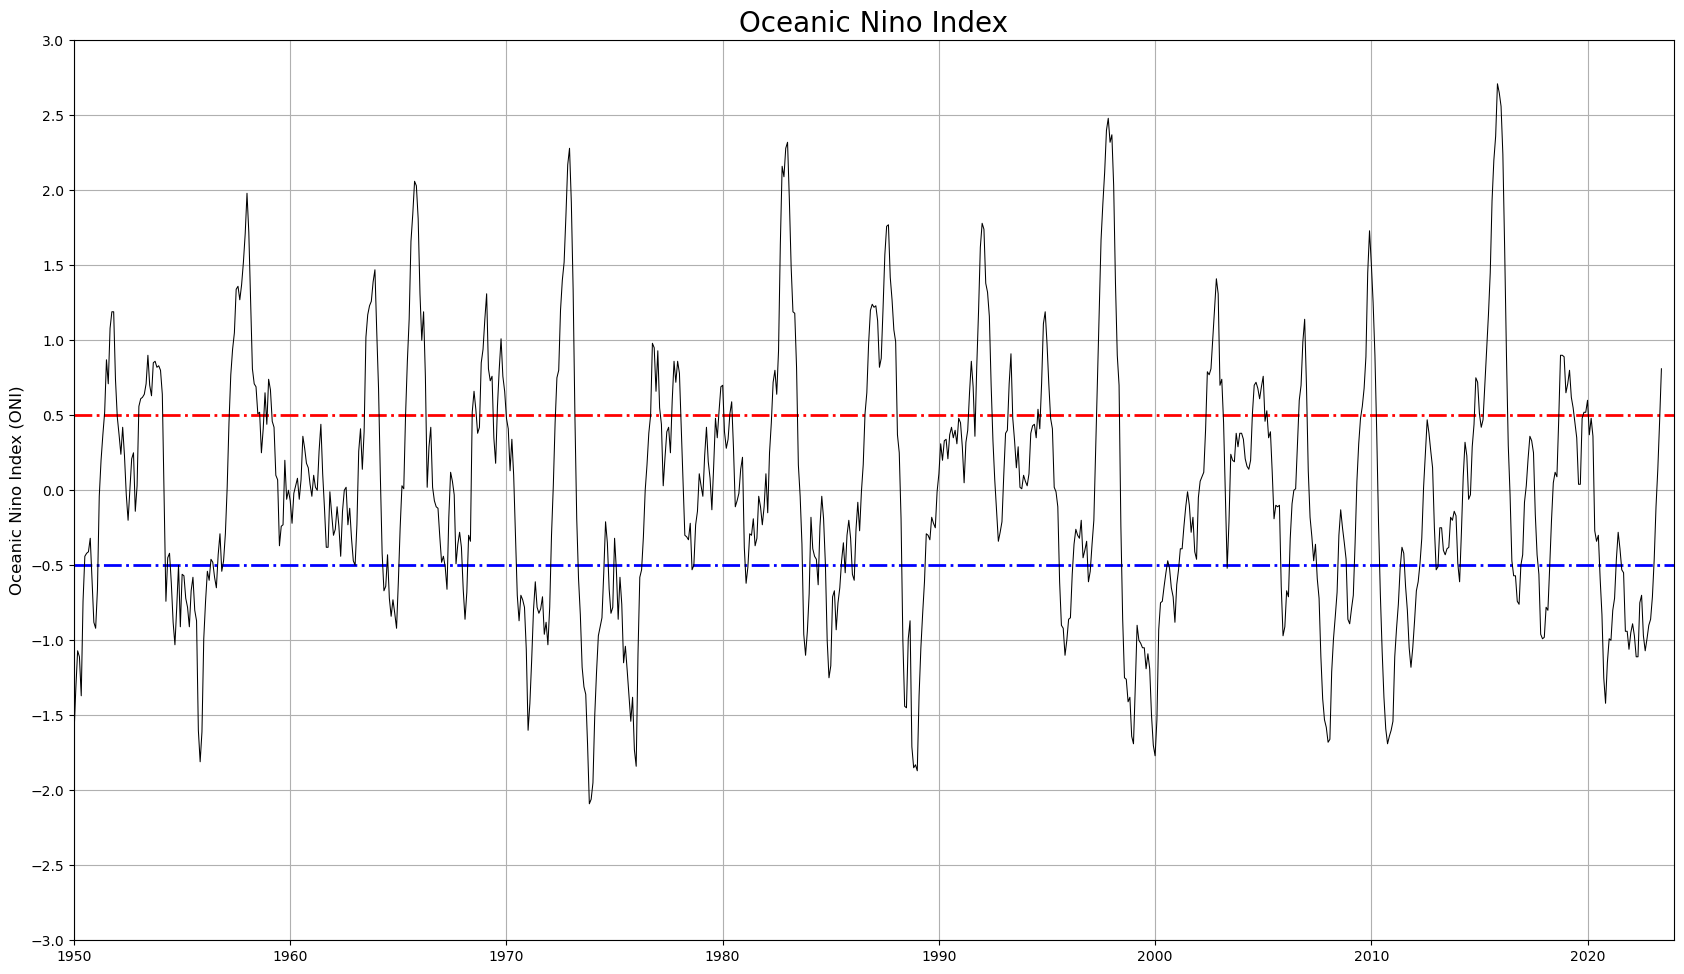

In [25]:
# OIN Graph

fig=plt.figure(figsize=(16,9))
ax=fig.add_axes([0,0,1,1])
line1=ax.plot(oin, 'black', linewidth=0.75)
ax.grid()
ax.set_title("Oceanic Nino Index", fontsize=20)
ax.set_xlim(0,888)
ax.set_ylim(-3,3)
plt.yticks(np.arange(-3,3.01,0.5))
#ax.legend(loc='lower right', fontsize=18, edgecolor='black')
ax.set_ylabel("Oceanic Nino Index (ONI)", fontsize=12)
# ax_formatter= FixedFormatter(['1950','1951','1952','1953','1954','1955','1956','1957','1958','1959',
#                              '1960','1961','1962','1963','1964','1965','1966','1967','1968','1969',
#                              '1970','1971','1972','1973','1974','1975','1976','1977','1978','1979',
#                              '1980','1981','1982','1983','1984','1985','1986','1987','1988','1989',
#                              '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999',
#                              '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
#                              '2010','2011','2012','2013','2014','2015','2016','2017','2018','2019',
#                              '2020','2021','2022','2023'])
# ax_locator=FixedLocator([0,12,24,36,48,60,72,84,96,108,120,132,144,156,168,180,192,204,216,228,240,252,264,276,288,300,312,
#                          324,336,348,360,372,384,396,408,420,432,444,456,468,480,492,504,516,528,540,552,564,576,588,600,
#                          612,624,636,648,660,672,684,696,708,720,732,744,756,768,780,792,804,816,828,840,852,864,876])
ax_formatter=FixedFormatter([1950,1960,1970,1980,1990,2000,2010,2020])
ax_locator=FixedLocator([0,120,240,360,480,600,720,840])
ax.xaxis.set_major_formatter(ax_formatter)
ax.xaxis.set_major_locator(ax_locator)


a=ax.get_ygridlines()
a2=a[7]
a2.set_color('red')
a2.set_linewidth(2)
a2.set_linestyle('dashdot')

a3=a[5]
a3.set_color('blue')
a3.set_linewidth(2)
a3.set_linestyle('dashdot')

    
#plt.savefig("ElNino3.4_Monthly_Mean_ULWRF_2.jpg", format='jpg', dpi=100, bbox_inches='tight')

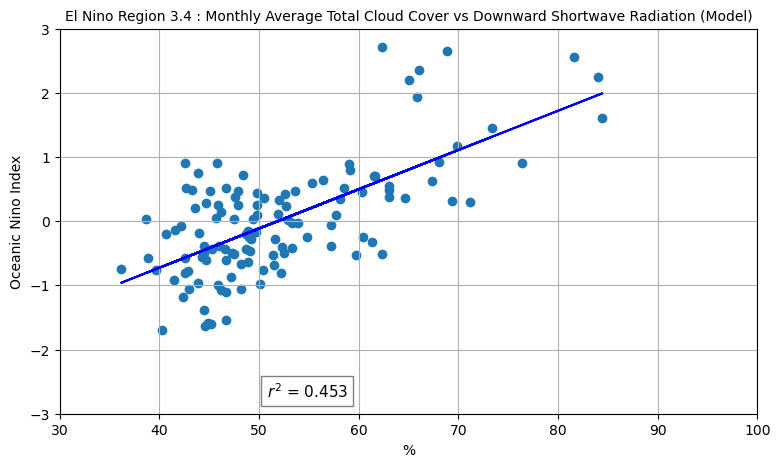

In [11]:
x=obtcc
y=oin[725:845]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

# Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(50.75, -2.75, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("Oceanic Nino Index")
plt.grid()
plt.ylim(-3,3)
plt.xlim(30,100)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs Downward Shortwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Model_Scatter_TCC_vs_DSWRF.png', format='png')

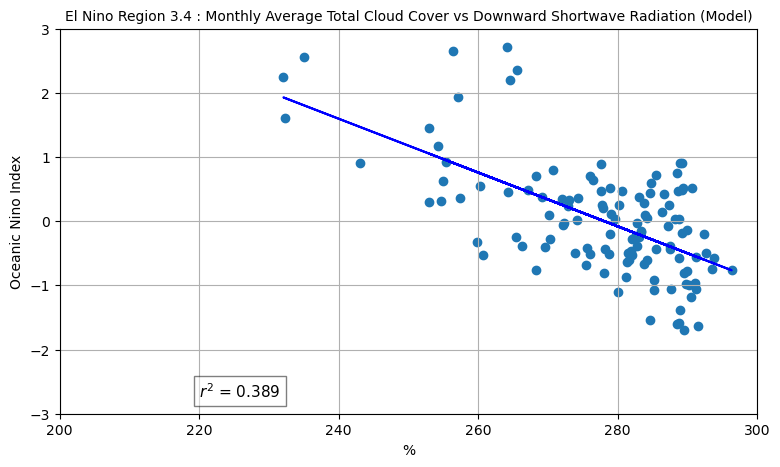

In [21]:
x=obulw
y=oin[725:845]
plt.figure(figsize=(9,5))
plt.scatter(x, y)

# Calculating R Squared and Rounding to 3 digits
corr_matrix = np.corrcoef(x,y)
corr = corr_matrix[0,1]
R_sq = corr**2

R_sq
rq=round(R_sq,3)
rq

plt.text(220, -2.75, '$r^2$ = ' +str(rq), fontsize = 11, 
         bbox = dict(facecolor = 'white', alpha = 0.5))

plt.ylabel("Oceanic Nino Index")
plt.grid()
plt.ylim(-3,3)
plt.xlim(200,300)
plt.xlabel('%')
plt.title('El Nino Region 3.4 : Monthly Average Total Cloud Cover vs Downward Shortwave Radiation (Model)', fontsize=10)
z = np.polyfit(x, y, 1)

p = np.poly1d(z)

plt.plot(x, p(x), 'b')
#plt.savefig('Model_Scatter_TCC_vs_DSWRF.png', format='png')